In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-23 11:36:27.890222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 11:36:28.816320: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student1/openssl/lib:
2023-07-23 11:36:28.816418: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student1/openssl/lib:
2023-07-23 11:36:28.816431: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [2]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
import xgboost as xg

In [3]:
import t3f

In [4]:
root_mean_squared_error = tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error')

2023-07-23 11:36:38.401111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 11:36:39.133791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10405 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:89:00.0, compute capability: 6.1


In [5]:
def calculate_mae(model,test_X,test_Y,name):
    model_pred = model.predict(test_X)

    root_error = np.sqrt(MSE(test_Y, model_pred))
    print("RMSE : % f" %(root_error))

    absolute_error = MAE(test_Y,model_pred)
    print("MAE : ", absolute_error)
    ma_error[name] = absolute_error
    rms_error[name] = root_error

In [6]:
def xgboost_model(name,input_parameters,output_parameters):
    x = pd.DataFrame(df.loc[:,input_parameters])
    y = pd.DataFrame(df.loc[:,output_parameters])
    #y = normalize_y(y)
    for each in x.columns:
        Nan_count = count_Nan(x,each)
        #print()
        if(Nan_count == 0):
            replace_Nan(x,each)

    train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=0.1,random_state=123)
    xg_reg2 = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

    xr_res = xg_reg2.fit(train_X,train_Y)
    pred = xg_reg2.predict(test_X)
    calculate_mae(xg_reg2,test_X,test_Y,name)
    pred = pd.DataFrame(pred)
#     print(pred.value_counts())
    return xg_reg2

In [7]:
ma_error = {}
rms_error = {}

In [8]:
df = pd.read_csv('cellular_dataframe.csv')

In [9]:
df = df.loc[df['area'] == 'Avenue']

In [10]:
df = df.select_dtypes(exclude=['object'])

In [11]:
def count_Nan(df,column):
  return df[column].isna().sum()

def replace_Nan(df,column):
  df.fillna(value=df[column].mean() , inplace=True)

for each in df.columns:
  replace_Nan(df, each)

In [12]:
def normalize_datarate(df):
    result = df.copy()
    max_value = df['datarate'].max()
    min_value = df['datarate'].min()
    #result['datarate'] = (df['datarate'] - min_value) / (max_value - min_value)
    result['datarate'] = 0 + ( ((df['datarate'] - min_value)*100) / (max_value - min_value))
    return result

In [13]:
df = normalize_datarate(df)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X= df.drop(columns=["datarate"])
y= df['datarate']
uni = SelectKBest(score_func = f_classif, k = 7
                  )
fit = uni.fit(X, y)
X.columns[fit.get_support(indices=True)].tolist()

['PCell_Downlink_Num_RBs',
 'PCell_Downlink_TB_Size',
 'SCell_Downlink_Num_RBs',
 'SCell_Downlink_TB_Size',
 'SCell_Downlink_RBs_MCS_28',
 'SCell_Downlink_RBs_MCS_31',
 'target_datarate']

In [15]:
df.head()

,ping_ms,datarate,jitter,Latitude,Longitude,Altitude,speed_kmh,COG,precipIntensity,precipProbability,...,SCell_Cell_Identity,SCell_TAC,SCell_Band_Indicator,SCell_MCC,SCell_MNC_Digit,SCell_MNC,SCell_Allowed_Access,SCell_freq_MHz,target_datarate,operator
216,443.361834,25.350431,0.000848,52.514013,13.335172,41.9,0.0,0.0,0.0652,0.04,...,33802248.0,1494.0,7.0,262.0,2.0,1.0,0.0,2600.0,350000000,1
217,443.361834,9.040442,0.000512,52.514008,13.335195,35.3,0.0,259.0,0.0652,0.04,...,51842565.0,49101.0,7.0,262.0,2.0,2.0,0.0,2600.0,350000000,2
218,443.361834,18.376250,0.000090,52.513830,13.334935,30.7,0.0,0.0,0.0653,0.04,...,51842568.0,49101.0,3.0,262.0,2.0,2.0,0.0,1800.0,350000000,2
219,1396.000000,26.014639,0.000207,52.513848,13.334832,32.3,0.0,265.9,0.0653,0.04,...,33802248.0,1494.0,7.0,262.0,2.0,1.0,0.0,2600.0,350000000,1
220,443.361834,7.675126,0.002268,52.514005,13.335195,35.4,0.0,259.0,0.0652,0.04,...,51842565.0,49101.0,7.0,262.0,2.0,2.0,0.0,2600.0,350000000,2


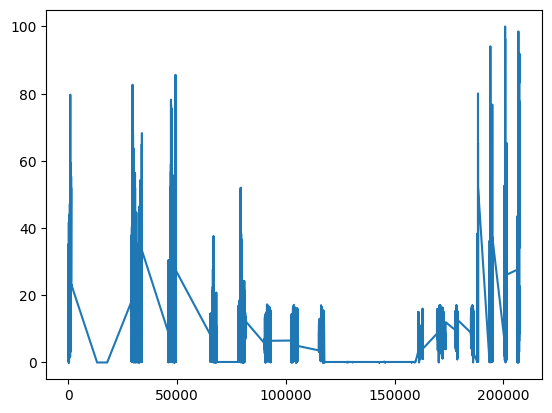

In [16]:
df['datarate'].plot()
plt.show()

In [17]:
df.shape

(43466, 151)

In [18]:
input_param = ['Latitude', 'Longitude', 'PCell_Downlink_Num_RBs',
               'PCell_Downlink_TB_Size',
               'SCell_Downlink_Num_RBs',
               'SCell_Downlink_TB_Size',
               'SCell_Downlink_RBs_MCS_28',
               'SCell_Downlink_RBs_MCS_31']
output_param = ['datarate']
UL_ALL_XG = xgboost_model('UL_ALL_XG', input_param, output_param)

RMSE :  3.816322
MAE :  2.6762704389962226


In [19]:
def plot_loss(res,param):
    len_epoch = len(res.history[param])
    plt.figure(figsize=(5,5))
    epoch = np.linspace(1,len_epoch,len_epoch)
    plt.plot(epoch,res.history[param])
    plt.xlabel('epochs')
    plt.ylabel(param)
    plt.show()

In [20]:
import keras_lmu
import tensorflow as tf
from tensorflow.keras import Model, Input
from sklearn.model_selection import train_test_split
# Assuming all required libraries and methods are already imported


def create_model(hidden_units, input_shape):
    inputs = Input(shape=(None, input_shape))  # None for the time dimension

    norm = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99)
    norm_out = norm(inputs)

    hidden_outputs = []
    for i in range(len(hidden_units)):
        lmu_layer = keras_lmu.LMU(
            memory_d=1,
            order=hidden_units[i],
            theta=784,
            hidden_cell=tf.keras.layers.SimpleRNNCell(units=hidden_units[i]),
            return_sequences=True
        )
        if i == 0:
            hidden_outputs.append(lmu_layer(norm_out))
        else:
            hidden_outputs.append(lmu_layer(hidden_outputs[-1]))

    output = tf.keras.layers.Dense(1, activation='linear',
                                   kernel_initializer='normal',
                                   bias_initializer='zeros')(hidden_outputs[-1])

    model = Model(inputs=inputs, outputs=output)
    return model


In [21]:
def DNN_model(name, input_parameters, output_parameters, hidden_units):
    input_shape = len(input_parameters)
    x = df.loc[:, input_parameters]
    y = df.loc[:, output_parameters]

    for each in x.columns:
        Nan_count = count_Nan(x, each)
        if Nan_count == 0:
            replace_Nan(x, each)

    train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.1, random_state=123)

    # Reshape the data to add a time dimension
    train_X = np.reshape(train_X.values, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X.values, (test_X.shape[0], 1, test_X.shape[1]))

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    model = create_model(hidden_units, input_shape)
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
                  loss='mae',
                  metrics=['mse', root_mean_squared_error])

    model_res = model.fit(train_X, train_Y, epochs=50, callbacks=[callback])

    calculate_mae(model, test_X, test_Y, name)
    return model, model_res

In [22]:
UL_ALL_DNN128,UL_ALL_DNN128_RES = DNN_model('UL_ALL_DNN128',input_param,output_param,[128,64,32,16])

/home/student1/miniconda3/envs/Accident_detection/lib/python3.9/site-packages/keras_lmu/layers.py:865: UserWarning: Approximating unknown impulse length with 5*theta; setting a fixed sequence length on inputs will remove the need for approximation
  warnings.warn(
2023-07-23 11:37:03.005967: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x1be05710


Epoch 1/50


2023-07-23 11:37:38.244355: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f179c3a5060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-23 11:37:38.245602: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-07-23 11:37:38.252069: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-23 11:37:38.596077: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  14/1223 [..............................] - ETA: 1:35:49 - loss: 5.8742 - mse: 112.8765 - root_mean_squared_error: 10.6243

KeyboardInterrupt: 